In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [40]:
houses = pd.read_csv('kc_house_data.csv', encoding ='latin-1')
houses.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [165]:
houses['price'] = houses['price'].astype(int)
houses.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15208,2329700440,20141027T000000,155000,3,1.50,970,8400,1.0,0,0,...,7,970,0,1966,0,98003,47.3284,-122.331,1230,8400
13509,3432501395,20140924T000000,551000,4,2.75,2170,5988,2.0,0,0,...,8,2170,0,2014,0,98155,47.7484,-122.317,1170,8147
21319,3438501583,20140911T000000,452000,3,2.75,2300,5090,2.0,0,0,...,8,1700,600,2007,0,98106,47.5450,-122.360,1530,9100
2623,6300500505,20140714T000000,359950,3,1.00,1400,4980,1.0,0,0,...,6,950,450,1943,0,98133,47.7041,-122.340,990,4980
10569,8856004327,20140509T000000,248000,4,3.00,2163,5883,2.0,0,0,...,7,2163,0,2006,0,98001,47.2734,-122.251,1700,10143


### 1.1 Изучите стоимость недвижимости

Text(0, 0.5, 'Кол-во квартир')

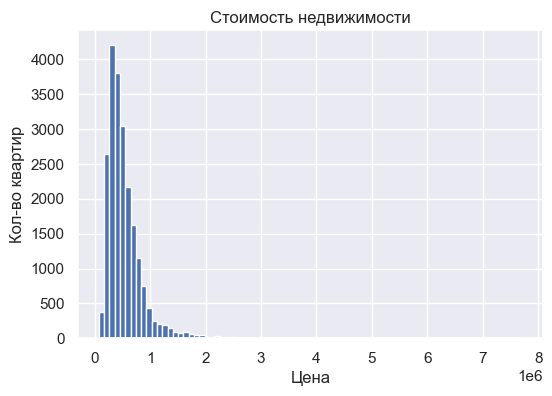

In [166]:
plt.figure(figsize=(6,4))
plt.hist(houses['price'], bins=80)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Кол-во квартир')

#### Максимальное кол-во квартир находится в ценовом диапазоне до 1 млн. 5

### 1.2 Изучите распределение квадратуры жилой

Text(0, 0.5, 'Кол-во квартир')

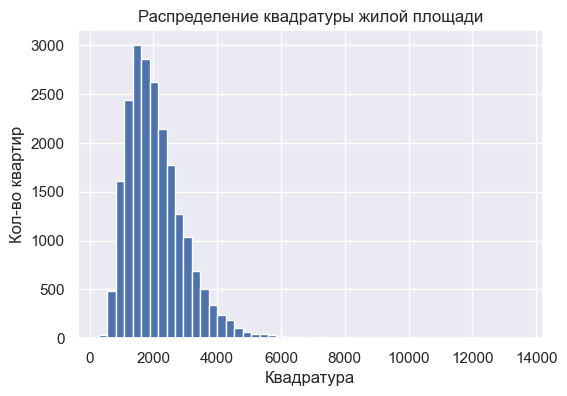

In [167]:
plt.figure(figsize=(6,4))
plt.hist(houses['sqft_living'], bins=50)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура')
plt.ylabel('Кол-во квартир')

#### Максимально количество квартир имеют жилую площадь в промежутке от 1000 до 2500 кв.футов.

### 1.3 Изучите распределение года постройки

Text(0, 0.5, 'Кол-во квартир')

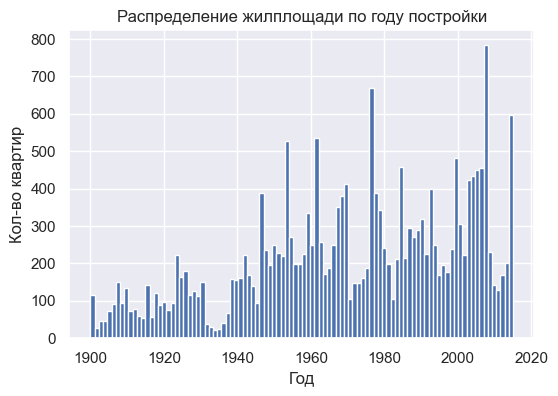

In [168]:
plt.figure(figsize=(6,4))
plt.hist(houses['yr_built'], bins=100)
plt.title('Распределение жилплощади по году постройки')
plt.xlabel('Год')
plt.ylabel('Кол-во квартир')

#### Глобальный простой в застройке наблюдался в период Великой депрессии. Максимально активная застройка просиходила в начале 2000-х.

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график.
Сделайте выводы.

In [75]:
dt = houses['waterfront'].value_counts()
dt.index = ['Вида нет', 'Вид есть']
dt.head()

Вида нет    21450
Вид есть      163
Name: waterfront, dtype: int64

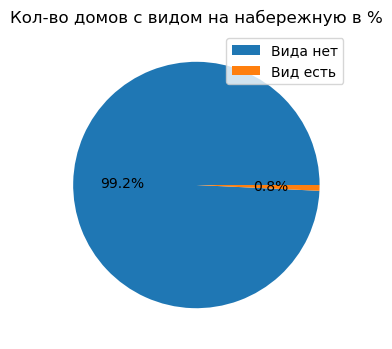

In [76]:
plt.figure(figsize=(6, 4))
plt.pie(dt, autopct='%1.1f%%')
plt.title('Кол-во домов с видом на набережную в %')
plt.legend(dt.index);

#### Кол-во домов с видом на набережную в процентном соотношении очень мало.

### 2.2 Изучите распределение этажей домов

In [90]:
dt_2 = houses['floors'].value_counts().reset_index()
dt_2.head()

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161


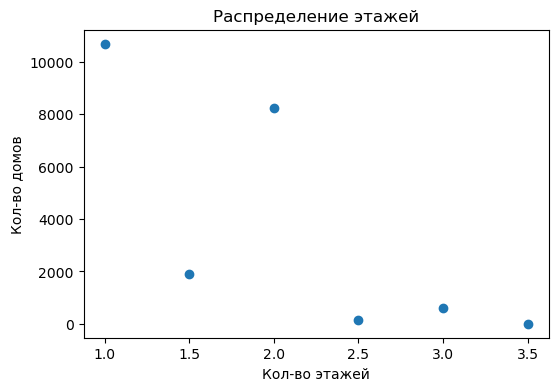

In [92]:
plt.figure(figsize = (6, 4))
plt.scatter(dt_2['index'], dt_2['floors'])

plt.title('Распределение этажей')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов');

#### Чаще всего встречаются дома с 1-им или 2-мя этажами.

### 2.3 Изучите распределение состояния домов

Text(0, 0.5, 'Кол-во домов')

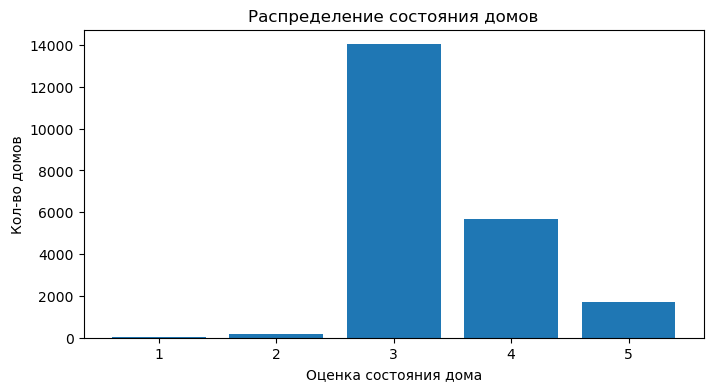

In [99]:
val = houses['condition'].value_counts()
    
plt.figure(figsize = (8, 4))    
plt.bar(val.index, val.values)
plt.title('Распределение состояния домов')    
plt.xlabel('Оценка состояния дома')
plt.ylabel('Кол-во домов')

#### Большинство домов находится в удовлетворительном состоянии. 

### 3. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [105]:
corr_matrix = houses.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

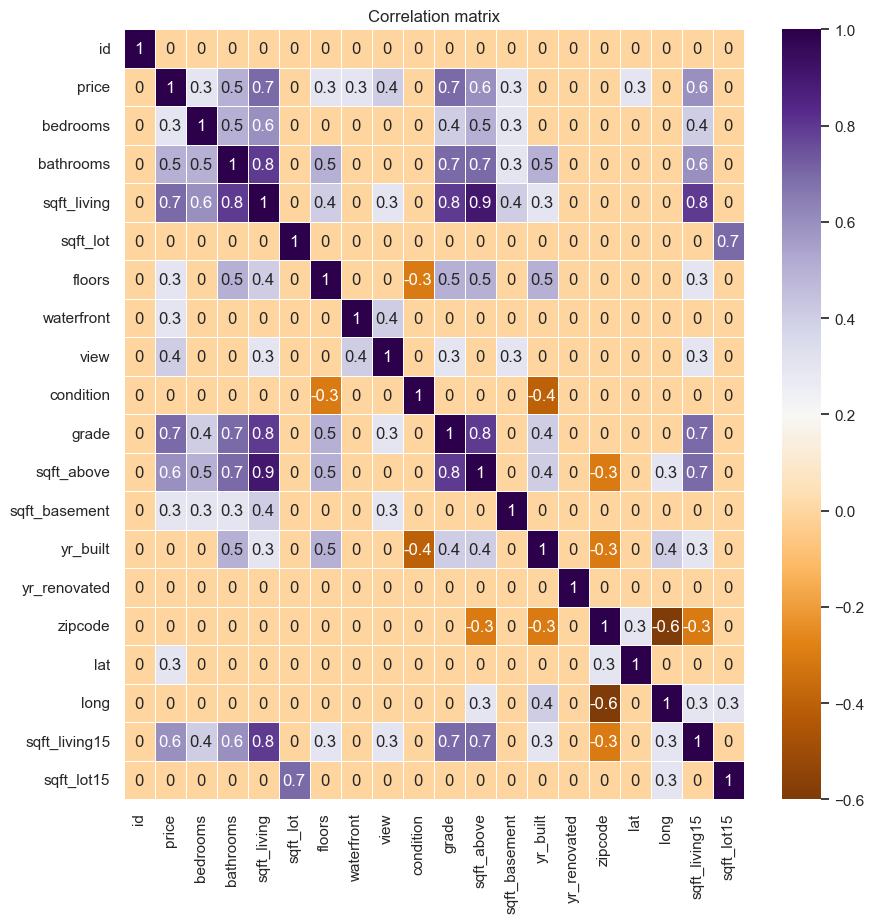

In [134]:
plt.figure(figsize=(10, 10))
sn.set(font_scale=1)
sn.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='PuOr')
plt.title('Correlation matrix');

#### Судя по корреляционной матрице наибольшее влияние на стоимость жилья оказывают: кол-во ванных комнат, кв.футы жилого помещения, вид из окна, оценка состояния дома и кв.футы без подвальных помещений. Меньшее влияние оказывают: кол-во спален, кол-во этажей, вид на набережную, кв.футы подвальных помещений.

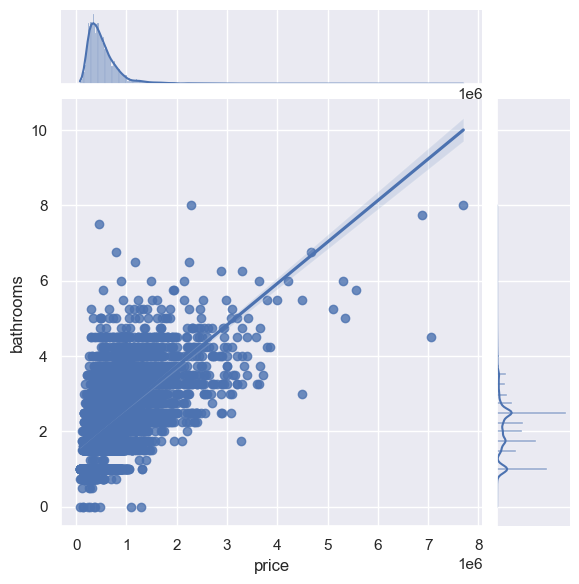

In [155]:
sn.jointplot(x=houses['price'], y=houses['bathrooms'], kind='reg');

#### Показана зависимость цены дома от кол-ва ванных комнат.

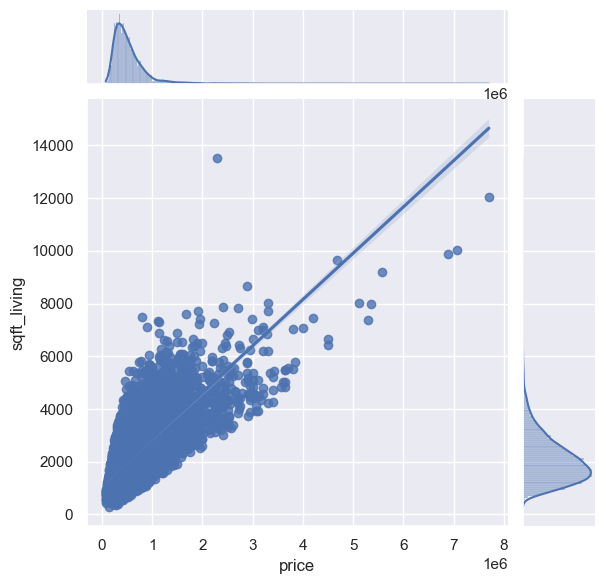

In [156]:
sn.jointplot(x=houses['price'], y=houses['sqft_living'], kind='reg');

#### Показана зависимость цены дома от кв.футов жилого помещения.

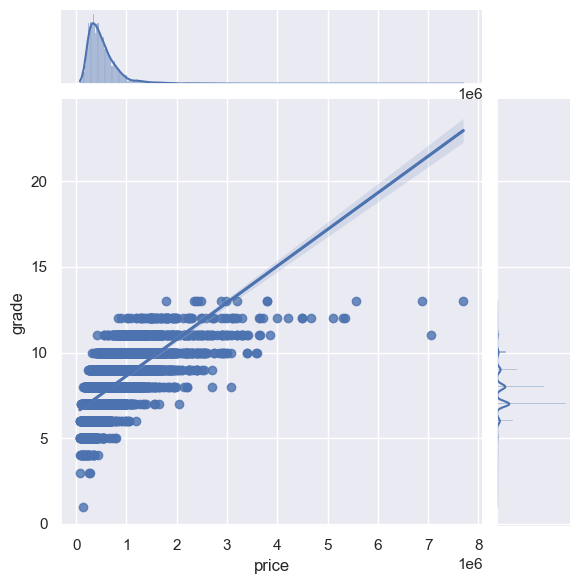

In [170]:
sn.jointplot(x=houses['price'], y=houses['grade'], kind='reg');

#### Показана зависимость цены дома от его оценки. Чем выше оценка, тем выше цена.

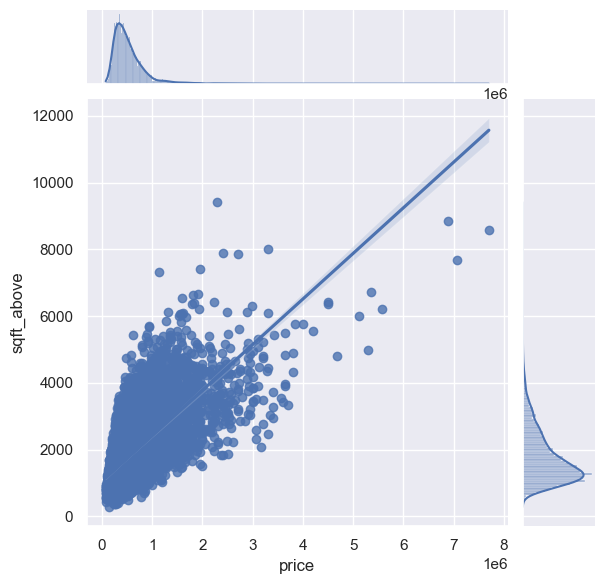

In [171]:
sn.jointplot(x=houses['price'], y=houses['sqft_above'], kind='reg');

#### Показана зависимость цены дома от кв.футов без подвального помещения.

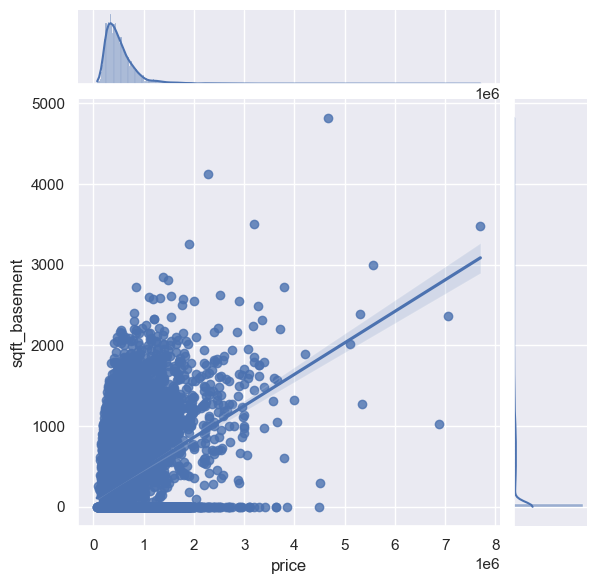

In [176]:
sn.jointplot(x=houses['price'], y=houses['sqft_basement'], kind='reg');

#### График говорит о том, что кв.футы подвального помещения не оказывают сильного влияния на стоимость дома.